In [15]:
import matplotlib as plt
import matplotlib.pyplot as plt
import pandas as pd  
import numpy as np
import scipy as sp 
import math 
import scipy.stats as stats

In [16]:


# Naloži podatke
df = pd.read_csv('Hobotnice.csv')

# Poimenujmo stolpec (če nima imena) – privzamemo prvi stolpec
stolpec = df.columns[0]

# Izračun povprečja in standardnega odklona
povprecje = df[stolpec].mean()
std_odklon = df[stolpec].std()  # privzeto ddof=1 = vzorčni odklon

# Izpis rezultatov
print(f"Povprečje: {povprecje:.4f}")
print(f"Standardni odklon: {std_odklon:.4f}")

Povprečje: 43.9677
Standardni odklon: 35.6045


Širine razredov $w$ določimo po modificiranem Freedman-Diaconisovim pravilu:

$$w \doteq \frac{2.6  \cdot \mathrm{IQR}}{\sqrt[3]{n}}$$


In [17]:
#Poračunamo IQR:

df = pd.read_csv('Hobotnice.csv')

# Izberi stolpec
stolpec = df.columns[0]

# Izračun IQR
q1 = df[stolpec].quantile(0.25)
q3 = df[stolpec].quantile(0.75)
iqr = q3 - q1

# Izpis
print(f"IQR: {iqr:.4f}")


IQR: 38.0000


In [18]:
#Približne širine razredov bodo torej:
n = 94
sirina = 2.6*iqr/np.cbrt(n)

print(sirina)

21.729396270660764


Širino, dobljeno po Freedman-Diaconisu zaokrožimo na 20 ("najbližji večkratnik števila 10") in to upoštevamo pri risanju histograma

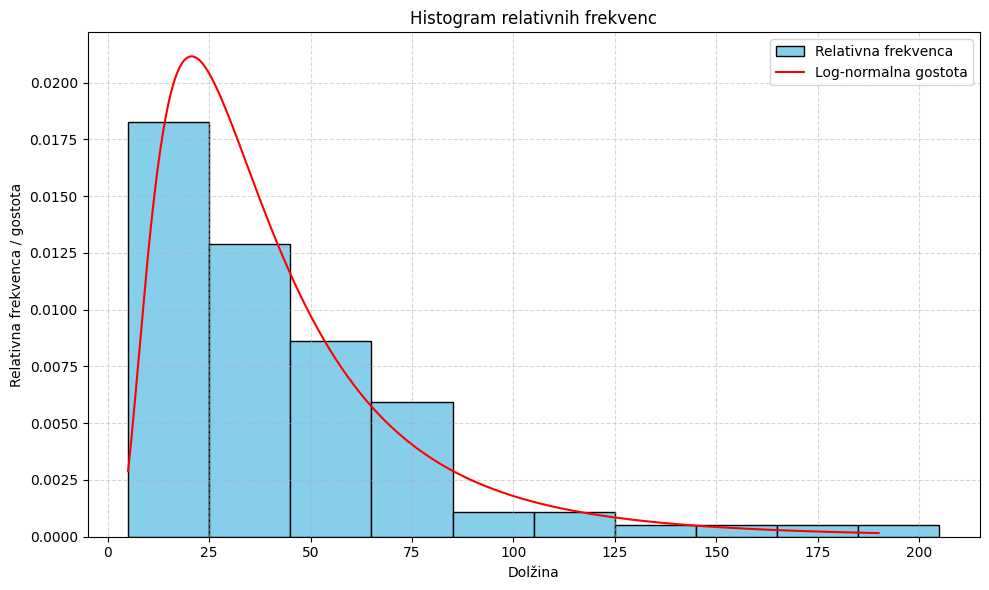

In [19]:
from scipy.stats import lognorm

df = pd.read_csv('Hobotnice.csv')

# Histogram - določimo širino stolpca
sirina = 20
min_vrednost = df[stolpec].min()
max_vrednost = df[stolpec].max()
meje = np.arange(min_vrednost, max_vrednost + sirina, sirina)

# Histogram relativnih frekvenc
plt.figure(figsize=(10, 6))
plt.hist(df[stolpec], bins=meje, color='skyblue', edgecolor='black', density=True, label='Relativna frekvenca')

# Log-normalna gostota
mean = 43.9677
std = 35.6045

# Pretvori v parametre log-normalne porazdelitve
# iz aritmetičnega povprečja in odklona
varianca = std**2
phi = np.sqrt(np.log(1 + varianca / mean**2))        # sigma (parametrizacija lognorm)
mu = np.log(mean) - 0.5 * phi**2                      # mu (log-mean)

# x-vrednosti za gostoto
x = np.linspace(min_vrednost, max_vrednost, 500)
pdf = lognorm.pdf(x, s=phi, scale=np.exp(mu))

# Nariši gostoto
plt.plot(x, pdf, 'r-', label='Log-normalna gostota')
plt.title('Histogram relativnih frekvenc')
plt.xlabel('Dolžina')
plt.ylabel('Relativna frekvenca / gostota')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
#Da določimo širine stolpcev, moramo poračunati še IQR logaritmov
stolpec = df.columns[0]

# Odstrani vrednosti ≤ 0 (log ni definiran)
podatki = df[df[stolpec] > 0][stolpec]

# Izračun logaritmov (naravni logaritem, baza e)
log_podatki = np.log(podatki)

# Izračun IQR logaritmov
q1 = np.percentile(log_podatki, 25)
q3 = np.percentile(log_podatki, 75)
iqr_log = q3 - q1

# Izpis rezultatov
print(f"Q1 (log): {q1:.4f}")
print(f"Q3 (log): {q3:.4f}")
print(f"IQR logaritmov: {iqr_log:.4f}")

Q1 (log): 2.9444
Q3 (log): 4.0431
IQR logaritmov: 1.0986


In [21]:
#Poračunamo širine razredov po modificiranem Freedman-Diaconisovim pravilu:
n = 94
sirina_log = 2.6*iqr_log/np.cbrt(94)
print(sirina_log)


0.628215309691761


Zaokrožimo navzgor na 1. Tako je vsak stolpec širine 1.

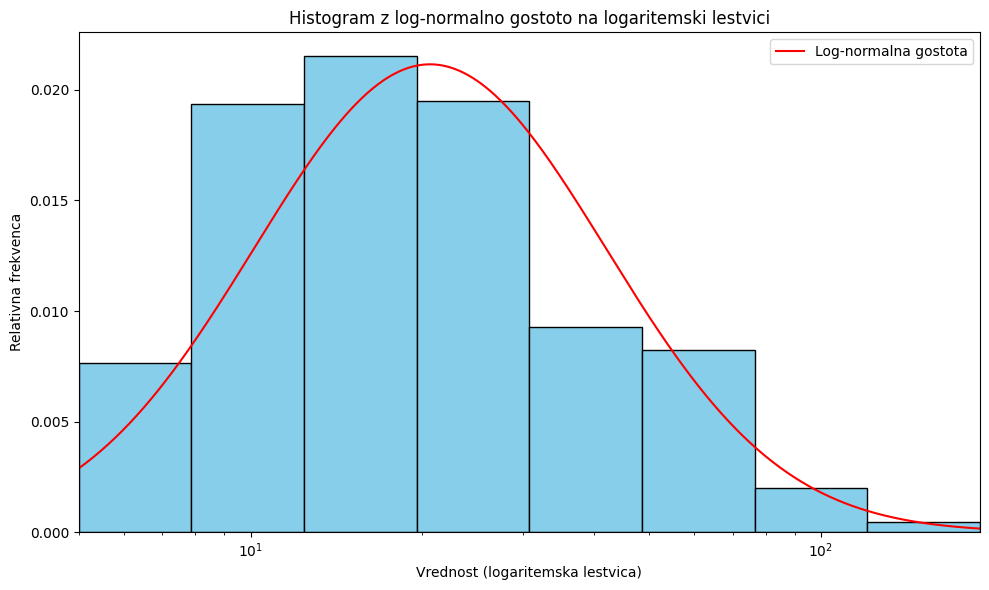

In [34]:
stolpec = df.columns[0]

# Uporabi samo pozitivne vrednosti (logaritemska skala zahteva >0)
podatki = df[df[stolpec] > 0][stolpec]

# Parametri log-normalne porazdelitve
mean = 43.9677
std = 35.6045

# Pretvori v parametre log-normalne porazdelitve
varianca = std**2
phi = np.sqrt(np.log(1 + varianca / mean**2))  # sigma (parametrizacija lognorm)
mu = np.log(mean) - 0.5 * phi**2  # mu (log-mean)

# Določimo minimalno in maksimalno vrednost podatkov v stolpcu (>0)
min_vrednost = podatki.min()
max_vrednost = podatki.max()

# Določimo število binov za histogram (logaritemsko razporejeni)
bins = np.logspace(np.log10(min_vrednost), np.log10(max_vrednost), num=9)

# Narišemo histogram s logaritmskimi binom
plt.figure(figsize=(10, 6))
plt.hist(podatki, bins=bins, color='skyblue', edgecolor='black', density=True)

# Log-normalna gostota
x = np.logspace(np.log10(min_vrednost), np.log10(max_vrednost), 500)
pdf = lognorm.pdf(x, s=phi, scale=np.exp(mu))

# Dodamo log-normalno gostoto
plt.plot(x, pdf, 'r-', label='Log-normalna gostota')

# Nastavimo logaritemsko lestvico za x-os
plt.xscale('log')

# Prilagodimo meje x-osi, da se graf lepo prilega podatkom
plt.xlim(min_vrednost, max_vrednost)

# Nastavitve osi in oznak
plt.xlabel('Vrednost (logaritemska lestvica)')
plt.ylabel('Relativna frekvenca')
plt.title('Histogram z log-normalno gostoto na logaritemski lestvici')

# Dodajanje legende
plt.legend()

# Prikaz grafika
plt.tight_layout()